In [1]:
from harness import Harness
import pandas
from harness.python.ext import HarnessExtension

In [2]:
class NetworkXMixin:
    graph = None

class NetworkXExtension(HarnessExtension):
    imports = 'networkx'
    mixin = NetworkXMixin
    
    def keywords(self, dataframe):
        return {
            'G': lambda: dataframe.graph,
            'df': lambda: dataframe,
        }
    
    def to_graph(self, source, target, edge_attr=True, df=None):
        df.graph = self.module_.from_pandas_dataframe(
            df, source, target, edge_attr
        )
        return df.graph
    
    def callback(self, dataframe, value):
        if isinstance(value, self.module_.Graph):
            return dataframe
        return value
    
    def edges(self, df):
        return df.graph.edges()
    
    def nodes(self, df):
        return df.graph.nodes()
        

In [3]:
extensions = [
    'harness.python.ext.base.JinjaExtension',
    'harness.python.ext.SciKit.SciKitExtension', 
    'harness.python.ext.Bokeh.BokehModelsExtension',     
    'harness.python.ext.Bokeh.BokehPlottingExtension',
    'harness.python.ext.Bokeh.BokehChartsExtension',
    '__main__.NetworkXExtension'
]

In [4]:
df = Harness(pandas.np.random.randn(10,2), extensions=extensions)

In [5]:
df.to_graph(source=0, target=1)

,0,1
0,-1.117878,1.262091
1,-1.359881,0.319997
2,1.434786,0.632406
3,-0.627768,-2.226961
4,-1.352356,-0.043742
5,0.577460,-0.980929
6,0.677719,-0.031278
7,0.874833,0.123264
8,-0.496750,0.627734
9,1.089115,-0.090981


In [6]:
df.to_graph(0, 1).edges()

[(0.31999679444203105, -1.3598809977366302),
 (1.2620913813930383, -1.1178781224538343),
 (-0.49675022780319023, 0.62773419742106085),
 (1.4347864011340115, 0.63240646399100764),
 (-0.043741889938154949, -1.3523562694971041),
 (-0.031278057054313593, 0.67771868270860069),
 (0.12326369370788465, 0.87483306496355573),
 (0.57746008474171939, -0.98092933524192161),
 (-0.6277682035366926, -2.2269610526154016),
 (1.0891147149001867, -0.090980690694986377)]

In [7]:
df.edges()

[(0.31999679444203105, -1.3598809977366302),
 (1.2620913813930383, -1.1178781224538343),
 (-0.49675022780319023, 0.62773419742106085),
 (1.4347864011340115, 0.63240646399100764),
 (-0.043741889938154949, -1.3523562694971041),
 (-0.031278057054313593, 0.67771868270860069),
 (0.12326369370788465, 0.87483306496355573),
 (0.57746008474171939, -0.98092933524192161),
 (-0.6277682035366926, -2.2269610526154016),
 (1.0891147149001867, -0.090980690694986377)]

In [8]:
Harness(df.spring_layout()).transpose().sample(2)

,0,1
0.319997,0.072384,0.232406
-1.352356,0.875902,0.171825


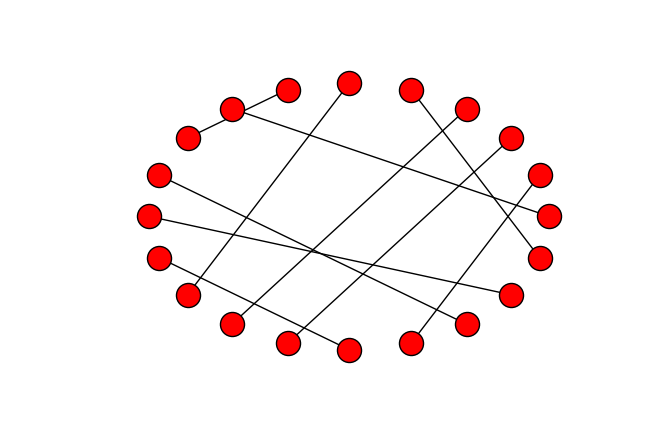

In [9]:
%matplotlib inline
df.draw_circular()